In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:

pathData = r"C:\data\udacity\airbnb_global\airbnb-listings.csv"

data = pd.read_csv(pathData, sep=";")

C:\Users\sce2rng\AppData\Local\Temp\ipykernel_9632\121390373.py:3: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(pathData, sep=";")


In [5]:
print(data['Country'].value_counts())
print(f"number of different countrys: {len(data['Country'].unique())}")
# get row ind data whre COuntry is 0
display(data[data['Country'] == '0'])

United States     134545
United Kingdom     61041
France             56562
Spain              45844
Australia          40693
Italy              33146
Canada             30787
Germany            20576
Denmark            20545
Netherlands        15181
Austria             7893
Belgium             7419
Ireland             6729
Hong Kong           6423
Greece              5127
Switzerland         2381
China                 51
Mexico                 2
Vatican City           2
Vanuatu                1
Uruguay                1
Cuba                   1
0                      1
Name: Country, dtype: int64
number of different countrys: 24


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
179209,I am a big out doors fan.,within a day,100%,NaN,f,https://a0.muscache.com/im/users/4262230/profi...,https://a0.muscache.com/im/users/4262230/profi...,Mission District,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0.0, 27.0","Host Is Superhost,Host Identity Verified,Is Lo..."


In [6]:
# drop raw from data where Country is 0 (corrupt row)
print(len(data))
data = data[data['Country'] != '0']
print(len(data))

494954
494953


In [7]:
print(data.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [8]:
# smale validation of data by pack Latitude and Longitude together by ", " and check with Geolocation
wrongRows = []
for index, row in data.iterrows():
    try:
        geoLat = str(round(float(row['Geolocation'].split(',')[0]), 13))
        geoLon = str(round(float(row['Geolocation'].split(',')[1]), 13))
        geoRound = geoLat + ", " + geoLon
    #print(geoRound)
        lat = str(round(row['Latitude'], 13))
        lon = str(round(row['Longitude'], 13))
    except AttributeError:
        print("Attribute error")
        print(index)
        print(row['Latitude'])
        print(row['Longitude'])
        print(row['Geolocation'])

    latLonRound = lat + ", " + lon
    if (latLonRound != geoRound) and (geoLat[-2] != lat[-2]) and (geoLon[-2] != lon[-2]):
        print(lat)
        print(lon)
        print(geoRound)
        print(row['Geolocation'])
        wrongRows.append(index)
print(len(wrongRows))

Attribute error
40783
nan
nan
nan
0


In [9]:
dataSel = data[['Price', 'Country', 'City', 'Latitude', 'Longitude', 'Review Scores Rating', 'Number of Reviews', 'Transit', 'Host Location', 'Property Type', 'Room Type', 'Square Feet', 'Guests Included']]

In [10]:
data['Transit']

0                                                       NaN
1              Public transport is very close  - 100 meters
2                                                       NaN
3         A few important spots in the city: - van Gogh ...
4                                                       NaN
                                ...                        
494949                                                  NaN
494950    There a bus stop 1 minute away and Yarraville ...
494951                                                  NaN
494952    Tram 82 stops right in front of the studio. It...
494953                                                  NaN
Name: Transit, Length: 494953, dtype: object

In [11]:
a = ~data['Transit'].isna()
a.astype(int)


0         0
1         1
2         0
3         1
4         0
         ..
494949    0
494950    1
494951    0
494952    1
494953    0
Name: Transit, Length: 494953, dtype: int32

In [12]:
data['Review Scores Rating']

0          89.0
1          99.0
2         100.0
3          97.0
4          78.0
          ...  
494949     60.0
494950     93.0
494951    100.0
494952      NaN
494953      NaN
Name: Review Scores Rating, Length: 494953, dtype: float64

<AxesSubplot:title={'center':'Room Type distribution'}>

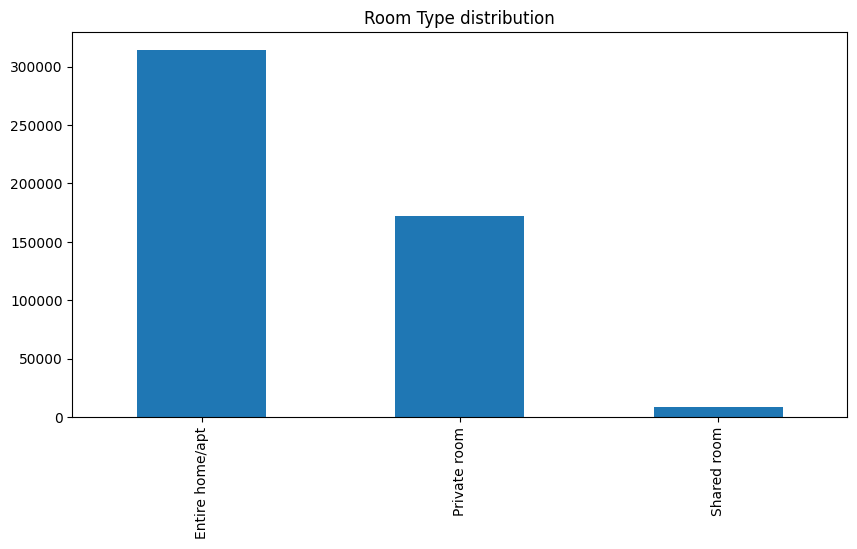

In [13]:
data['Room Type'].value_counts()
data['Room Type'].value_counts().plot(kind='bar', figsize=(10,5), title='Room Type distribution')

<AxesSubplot:title={'center':'Property Type distribution'}>

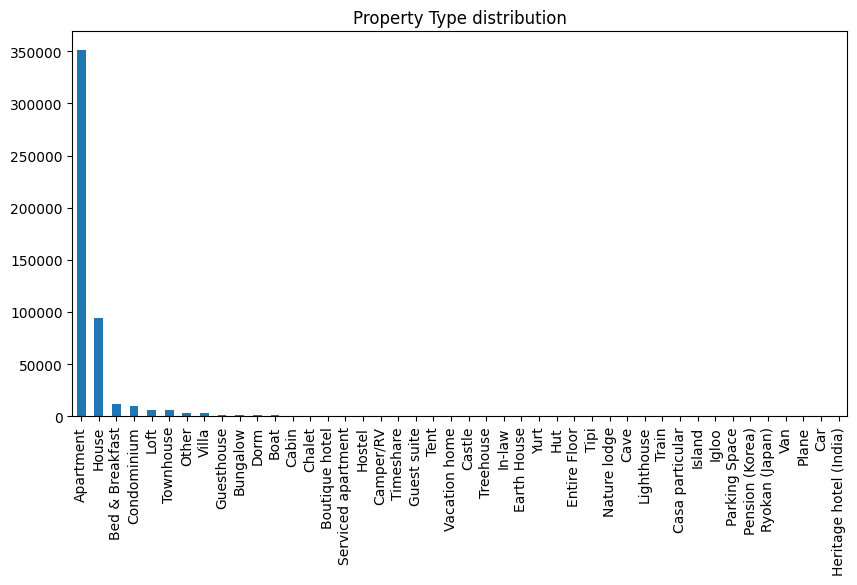

In [14]:
#data['Property Type'].value_counts()
data['Property Type'].value_counts().plot(kind='bar', figsize=(10,5), title='Property Type distribution')

<AxesSubplot:title={'center':'Country distribution'}>

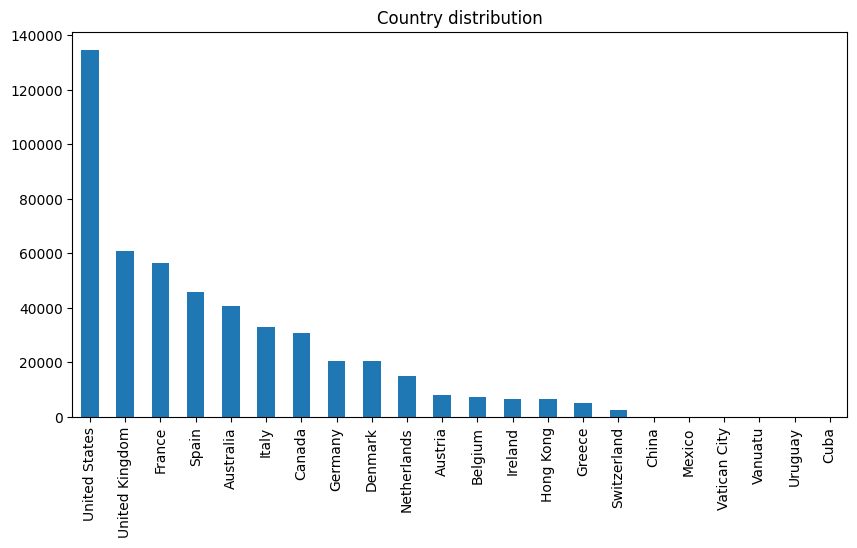

In [15]:
data['Country'].value_counts().plot(kind='bar', figsize=(10,5), title='Country distribution')

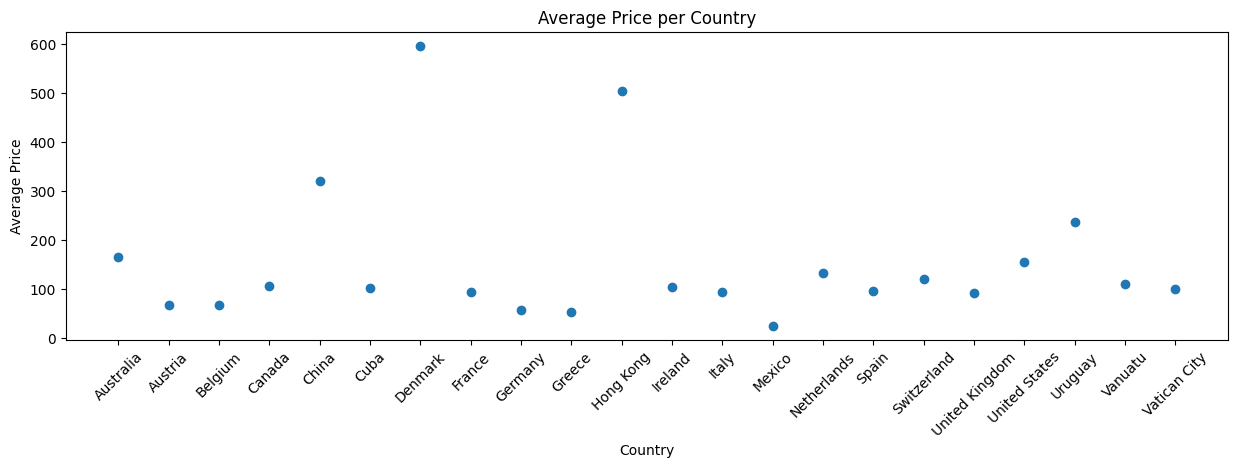

In [16]:
# plot mean of price per country
groupCountry = data.groupby("Country").mean()["Price"]
plt.figure(figsize=(15, 4))
plt.plot(groupCountry, marker='o', linestyle='')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.title('Average Price per Country')
plt.show()




In [17]:
display(data.iloc[40783])
print(data.at[40783, 'Price'])
print(data.at[40783, 'Price'])


ID                                                             810552
Listing Url                       https://www.airbnb.com/rooms/810552
Scrape ID                                              20170401232214
Last Scraped                                               2017-04-02
Name                               The Best Located Studio On Mission
                                                 ...                 
Cancellation Policy                                               NaN
Calculated host listings count                                    NaN
Reviews per Month                                                 NaN
Geolocation                                                       NaN
Features                                                          NaN
Name: 40783, Length: 89, dtype: object

nan
nan


In [18]:
display(data.head(2))

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [19]:
# check date of dataset
date = list(data['Last Scraped'])
print(data['Last Scraped'].value_counts())


2017-05-03    46064
2017-05-09    45182
2017-04-05    37640
2017-03-05    32159
2017-04-08    30990
2017-05-08    25906
2017-04-02    23864
2017-03-04    21745
2017-04-03    21220
2017-06-15    20545
2017-04-04    18851
2017-05-04    17660
2017-04-06    17186
2017-03-15    14858
2017-06-03    12714
2016-05-04    12337
2017-03-07     9663
2017-04-07     9091
2017-05-10     6988
2017-02-18     6729
2016-07-07     6608
2016-08-07     6474
2016-07-09     6272
2017-05-11     6009
2017-06-02     5307
2017-05-05     4934
2016-01-04     3818
2016-09-07     3585
2017-05-02     3348
2016-09-06     3277
2016-08-08     2408
2016-04-02     1961
2017-05-06     1913
2015-10-12     1847
2017-05-12     1227
2016-05-21      739
2016-04-11      576
2016-05-19      511
2016-05-18      480
2016-05-20      413
2016-04-03      389
2016-05-17      362
2015-10-18      347
2015-10-17      310
2016-04-12      289
2015-10-16      132
2015-10-19       25
Name: Last Scraped, dtype: int64


In [20]:
print(data['City'].value_counts())
print(f"number of different cities: {len(data['City'].unique())}")


Paris                            54513
London                           47423
Berlin                           20454
New York                         19528
Los Angeles                      19426
                                 ...  
Italia/ Roma/Lazio                   1
Bernal Heights, San Francisco        1
Roslyn Gardens                       1
Paddington/Woollahra                 1
villa verde bajo                     1
Name: City, Length: 5531, dtype: int64
number of different cities: 5532


In [21]:
data['Host Location'].value_counts()


Paris, Île-de-France, France                                                                                                                                                  44468
New York, New York, United States                                                                                                                                             33837
London, England, United Kingdom                                                                                                                                               22734
Rome, Lazio, Italy                                                                                                                                                            20366
Los Angeles, California, United States                                                                                                                                        18755
                                                                                                    

In [22]:
curiusHostLocation = data[data['Host Location'] == 'this house is close to Malibu beach and with the private pool and beautiful city view. you live her like your own home. the room is very clear and quiet. enjoy your trip.']


print(curiusHostLocation['City'])
print(curiusHostLocation['Country'])
print(curiusHostLocation['Host Location'])
print(curiusHostLocation['Price'])


494892    Topanga
Name: City, dtype: object
494892    United States
Name: Country, dtype: object
494892    this house is close to Malibu beach and with t...
Name: Host Location, dtype: object
494892    100.0
Name: Price, dtype: float64


In [23]:
print(len(data['Room Type'].value_counts()))
print(data['Room Type'].value_counts())

3
Entire home/apt    313707
Private room       172306
Shared room          8939
Name: Room Type, dtype: int64


In [24]:
print(len(data['Property Type'].value_counts()))
print(data['Property Type'].value_counts())

44
Apartment                 351404
House                      93887
Bed & Breakfast            12080
Condominium                10237
Loft                        5933
Townhouse                   5930
Other                       3235
Villa                       3202
Guesthouse                  1639
Bungalow                    1216
Dorm                        1204
Boat                         967
Cabin                        788
Chalet                       641
Boutique hotel               514
Serviced apartment           416
Hostel                       395
Camper/RV                    381
Timeshare                    178
Guest suite                  142
Tent                          99
Vacation home                 73
Castle                        64
Treehouse                     64
In-law                        44
Earth House                   37
Yurt                          29
Hut                           29
Entire Floor                  18
Tipi                          16
Nature 

In [ ]:
dataOfInterest = selData = data[['Price', 'Minimum Nights', 'Bathrooms', 'Bedrooms','Country', 'Latitude', 'Longitude', 'Review Scores Rating', 'Number of Reviews', 'Transit', 'Host Location', 'Property Type', 'Room Type', 'Square Feet', 'Guests Included']]


In [25]:
countryCodeDict = {"cx":"christmas island", "nl":"netherlands", "us": "united states", "es": "spain", "fr": "france", "it": "italy", 
                   "gb": "united kingdom", "de": "germany", "au": "australia", "ca": "canada", "pt": "portugal", 
                   "gr": "greece", "be": "belgium", "at": "austria", "ch": "switzerland", "dk": "denmark", "se": "sweden", 
                   "no": "norway", "fi": "finland", "ie": "ireland", "nz": "new zealand", "lu": "luxembourg", "sg": "singapore", 
                   "hk": "hong kong", "jp": "japan", "kr": "south korea", "tw": "taiwan", "cn": "china", "br": "brazil", "mx": "mexico", 
                   "ar": "argentina", "cl": "chile", "co": "colombia", "pe": "peru", "za": "south africa"}

# get all Host Locations with only 2 letters as a list
dataOfInterest['Host Location'] = dataOfInterest['Host Location'].str.lower()
usedCountryCodes = list(dataOfInterest[dataOfInterest['Host Location'].str.len() == 2]['Host Location'])
usedCountryCodes = list(set(usedCountryCodes))

# get all usedCountryCodes that are not in countryCodeDict
notInDict = [code for code in usedCountryCodes if code not in countryCodeDict.keys()]
print(len(notInDict))
print(notInDict)




99
['mq', 'vg', 'tn', '加州', 'bc', 'hr', 'la', 'al', 'ap', 'jm', 'lt', 'dz', 'vn', 'cm', 'eg', 're', 'am', 'bg', 'hu', 'is', 'a1', 'bh', 'ec', 'a2', 'gt', 'bl', 'tx', 'qa', 'bj', 'ru', 'rw', 'im', 'rd', 'vc', 'sk', '香港', 'mg', '伦敦', 'vi', 'md', 'th', 'ro', 've', 'dj', 'id', 'bt', 'rm', 'xk', 'il', 'as', 'mc', '中国', 'pr', 'lv', 'cz', 'ua', 'cy', 'ng', 'cw', 'mt', 'dm', 'sp', 'ge', 'tt', 'sa', 'lb', 'cr', 'lk', 'in', 'uk', 'ht', 'zm', 'ph', 'by', 'ae', 'ee', 'my', 'uy', 'hn', 'aw', 'pa', 'tr', 'dc', 'je', 'pl', 'ke', 'gh', 'pf', 'do', 'wa', 'rs', 'nj', 'eu', 'ma', 'bd', 'gp', 'si', 'nc', 'jo']


In [26]:
# missing country codes
restCountryCodes = { 'ua': 'ukraine', 'sk': 'slovakia', 'wa': 'western sahara', 'dj': 'djibouti', 'by': 'belarus', 
                    'is': 'iceland', 'zm': 'zambia', 'mq': 'martinique', 'bl': 'saint barthélemy', 'la': 'laos', 
                    'ec': 'ecuador', 'jo': 'jordan', 'nc': 'new caledonia', 'mt': 'malta', 'eg': 'egypt', 
                    'ro': 'romania', 'rw': 'rwanda', 'de': 'germany', 'ke': 'kenya', '伦敦': 'united kingdom', 
                    'mg': 'madagascar', 'ae': 'united arab emirates', '加州': "united states", 'hn': 'honduras', 
                    'cz': 'czech republic', 'md': 'moldova', 'nl': 'netherlands', 'do': 'dominican republic', 
                    'si': 'slovenia', 'ma': 'morocco', 'dk': 'denmark', 'cm': 'cameroon', 'xk': 'kosovo', 
                    'bg': 'bulgaria', 'pr': 'puerto rico', 've': 'venezuela', 'sp': 'spain', 'th': 'thailand', 
                    'cr': 'costa rica', 'uk': 'united kingdom', 'lb': 'lebanon', 'ru': 'russia', 'vn': 'vietnam', 
                    'pa': 'panama', 'rd': 'dominican republic', 'fr': 'france', 'rs': 'serbia', 'bt': 'bhutan', 
                    'ge': 'georgia', 'al': 'albania', 'in': 'india', 'lt': 'lithuania', 'ee': 'estonia', 
                    'tt': 'trinidad and tobago', 'ng': 'nigeria', 'eu': 'european union', 'am': 'armenia', 
                    'it': 'italy', 'gh': 'ghana', 'hu': 'hungary', 'cw': 'curaçao', 'gr': 'greece', 'dm': 'dominica', 
                    'tn': 'tunisia', 'uk': 'united kingdom', 'id': 'indonesia', 'tr': 'turkey', 
                    'vc': 'saint vincent and the grenadines', 'ph': 'philippines', 'bd': 'bangladesh', 'rm': 'rome', 
                    'ht': 'haiti', 'qa': 'qatar', 'pl': 'poland', 'bc': 'british columbia', '中国': 'china', 
                    'it': 'italy', 'gt': 'guatemala', 'dz': 'algeria', 'cy': 'cyprus', 'vg': 'united kingdom', 
                    'gp': 'guadeloupe', 'bj': 'benin', 'pf': 'french polynesia', 'la': 'laos', 'uy': 'uruguay', 
                    'je': 'jersey', 'sa': 'saudi arabia', 'hr': 'croatia', 'il': 'israel', 'im': 'isle of man', 
                    're': 'réunion', 'lk': 'sri lanka', 'lv': 'latvia', 'mc': 'monaco', 'bh': 'bahrain', 'jm': 'jamaica', 
                    'es': 'spain', 'aw': 'aruba', 'my': 'malaysia', 'uk': 'united kingdom', 
                    'vi': "united states", 'dc': "united states", 'tx': "united states", 'nj': "united states", 'ny': "united states",'as': "united states", 
                    'eu': 'european union', '香港': 'hong kong', 'ap': 'asia/pacific region'}


# join countryCodes and restCountryCodes
countryCodeDict.update(restCountryCodes)
print(len(countryCodeDict))

otherCountrys = {"sydney": "australia", "scotland": 'united kingdom', "england": 'united kingdom', "london": 'united kingdom', 
                "u.k.": "united kingdom", "u.s.": "united states", "uk":'united kingdom', "us": "united states", "canadá": "canada", 
                "mallorca": "spain", "españa": "spain", "roma": "italy", "italia": "italy", "paris": "france", "ny": "united states",
                "new york": "united states"}
restCountrys = ["brasil", "uzbekistan", "cuba", "fiji", "ethiopia", "south korea", "grece", "iraq", "yemen", "bahamas", "israel", "vanuatu", "vatican city", "luxemburg", "libya", "senegal", "istanbul"]

133


In [27]:
# clean host location
dfHostLocation = dataOfInterest['Host Location']

# replace host location with country code if it is in the dictionary
for key in countryCodeDict.keys():
    dfHostLocation = dfHostLocation.replace(key, countryCodeDict[key])

# when one of the Values of the countryCodeDict is part of the Host Location, replace it with that value
for value in list(countryCodeDict.values()) + restCountrys:
    dfHostLocation = dfHostLocation.replace({f'.*{value}.*': value}, regex=True)

# replace other parts
for key in otherCountrys.keys():
    dfHostLocation = dfHostLocation.replace({f'.*{key}.*': otherCountrys[key]}, regex=True)

# replace Host location with 2 "," with the part after the last ","
dfHostLocation = dfHostLocation.apply(lambda x: str(x).split(',')[-1] if str(x).count(',') == 2 else x)

print(dfHostLocation.value_counts())



united states                            203193
united kingdom                            59720
france                                    55449
spain                                     42867
italy                                     32637
                                          ...  
camano island                                 1
maroubra beach                                1
bronte beach                                  1
everywhere at once                            1
tin hau near to victoria park & metro         1
Name: Host Location, Length: 1090, dtype: int64


In [28]:
# get every Host Location which is not in the countryCodeDict values
foundCountrys = list(set(list(countryCodeDict.values()) + list(otherCountrys.values()) + restCountrys))

# get every Host Location which is not in found countrys and more then 1 time in dfHostLocation
otherHostLocation = dfHostLocation[~dfHostLocation.isin(foundCountrys)]
otherHostLocation = otherHostLocation[otherHostLocation.map(dfHostLocation.value_counts()) > 5]
print(len(otherHostLocation.value_counts()))
print(otherHostLocation.value_counts())


56
québec                                                                  155
danmark                                                                 153
hongkong                                                                 91
vacation rentals                                                         80
california                                                               76
londres                                                                  75
europe                                                                   59
texas                                                                    55
quebec                                                                   43
香港中环堅尼地dao                                                               36
wales                                                                    31
venice beach, ca                                                         24
dublin                                                                   22
londra   

In [29]:
counts = dfHostLocation[~dfHostLocation.isin(foundCountrys)].value_counts()
counts = counts[counts > 10]
print(len(counts))
counts

25


québec                       155
danmark                      153
hongkong                      91
vacation rentals              80
california                    76
londres                       75
europe                        59
texas                         55
quebec                        43
香港中环堅尼地dao                    36
wales                         31
venice beach, ca              24
dublin                        22
buenos aires                  19
londra                        19
gold coast, queensland        19
tel aviv                      18
espana                        17
calviá                        17
toronto, ontario              16
中國香港                          14
seoul, korea                  13
san francisco, california     13
brooklyn                      12
your current city             11
Name: Host Location, dtype: int64

In [30]:
# replace leftover
lastCountrys = {"copenhagen": "denmark", "berlin": "germany", "mexico city": "mexico",
                "québec": "canada","quebec": "canada", "danmark": "denmark", "nederland": "netherlands", "nederlanden": "netherlands",
                "hongkong": "hong kong", "california": "united states", "texas": "united states", "florida": "united states",
                "香港中环堅尼地dao": "hong kong", "wales": "united kingdom", "venice beach": "united states", "venice": "italy",
                "dublin": "irland", "buenos aires": "argentina", "barcelona": "spain", "madrid": "spain", "lisbon": "portugal", 
                "londra": "united kingdom", "queensland": "australia", "victoria": "australia", "melbourne": "australia",
                "tel aviv": "israel", "espana": "spain", "korea": "south korea", "calviá": "spain", "ontario": "canada", 
                "中國香港": "hong kong", "brooklyn": "united states", "macau": "china", "shoreditch": 'united kingdom'}

for key in lastCountrys.keys():
    dfHostLocation = dfHostLocation.replace({f'.*{key}.*': lastCountrys[key]}, regex=True)


In [ ]:
# drop rows with more than 70% nan values
columnNum = dataOfInterest.shape[1]
print(dataOfInterest.shape[0])
dataOfInterest = dataOfInterest.dropna(thresh=int(columnNum*0.7))
print(dataOfInterest.shape[0])

In [31]:
#get number of nan values in each column
print(f"Price nans: {dataOfInterest['Price'].isna().sum()}")
print(f"Latitude nans: {dataOfInterest['Latitude'].isna().sum()}")
print(f"Longitude nans: {dataOfInterest['Longitude'].isna().sum()}")
print(f"Review Scores Rating nans: {dataOfInterest['Review Scores Rating'].isna().sum()}")
print(f"Number of Reviews nans: {dataOfInterest['Number of Reviews'].isna().sum()}")
print(f"Square Feet nans: {dataOfInterest['Square Feet'].isna().sum()}")
print(f"Guests Included nans: {dataOfInterest['Guests Included'].isna().sum()}")
print(f"Host Location nans: {dataOfInterest['Host Location'].isna().sum()}")
print(f"Property Type nans: {dataOfInterest['Property Type'].isna().sum()}")
print(f"Room Type nans: {dataOfInterest['Room Type'].isna().sum()}")
print(f"Country nans: {dataOfInterest['Country'].isna().sum()}")
print(f"Minimum Nights nans: {dataOfInterest['Minimum Nights'].isna().sum()}")
print(f"Bathrooms nans: {dataOfInterest['Bathrooms'].isna().sum()}")
print(f"Bedrooms nans: {dataOfInterest['Bedrooms'].isna().sum()}")


Price nans: 7958
Latitude nans: 1
Longitude nans: 1
Review Scores Rating nans: 127819
Number of Reviews nans: 1
Square Feet nans: 482745
Guests Included nans: 1
Host Location nans: 2263
Property Type nans: 11
Room Type nans: 1
Country nans: 3


             ID                           Listing Url       Scrape ID  \
40783    810552   https://www.airbnb.com/rooms/810552  20170401232214   
159712  1553260  https://www.airbnb.com/rooms/1553260  20170407214119   
311255  1463549  https://www.airbnb.com/rooms/1463549  20151011232639   

       Last Scraped                                Name  \
40783    2017-04-02  The Best Located Studio On Mission   
159712   2017-04-08      ¡Urgente! Busco Piso en Madrid   
311255   2015-10-12           Appartamento NOCE MOSCATA   

                                                  Summary  \
40783   *Completely Private Studio*  The Studio is cen...   
159712  Hola me llamo Filomena soy Italiana tengo 24 c...   
311255  La nostra casa offre appartamenti recentemente...   

                                                    Space  \
40783   This naturally-lit and intimate studio is idea...   
159712                                                NaN   
311255  L'alloggio si trova in mansarda e 

In [32]:
# show row where Latitude is nan
display(dataOfInterest[dataOfInterest['Latitude'].isna()])
display(dataOfInterest[dataOfInterest['Number of Reviews'] == 0])

,Price,Country,Latitude,Longitude,Review Scores Rating,Number of Reviews,Transit,Host Location,Property Type,Room Type,Square Feet,Guests Included
40783,NaN,NaN,NaN,NaN,NaN,NaN,"I live one block from 24th Bart Station, from ...","san francisco, california, united states",NaN,NaN,NaN,NaN


,Price,Country,Latitude,Longitude,Review Scores Rating,Number of Reviews,Transit,Host Location,Property Type,Room Type,Square Feet,Guests Included
12,99.0,Netherlands,52.366877,4.864596,NaN,0.0,Many trams stop at approximately 200 m from ou...,"amsterdam, north holland, the netherlands",Bed & Breakfast,Private room,NaN,2.0
24,110.0,Netherlands,52.358812,4.860318,NaN,0.0,We're right on the #1 tram line coming from Ce...,"amsterdam, north holland, netherlands",Apartment,Entire home/apt,NaN,2.0
26,150.0,Netherlands,52.376340,4.845194,NaN,0.0,Only a few metres away there are trams and bus...,"amsterdam, north holland, netherlands",Apartment,Entire home/apt,NaN,1.0
31,92.0,Netherlands,52.377609,4.851447,NaN,0.0,NaN,nl,Apartment,Entire home/apt,NaN,1.0
34,120.0,Netherlands,52.368115,4.851338,NaN,0.0,NaN,"amsterdam, north holland, netherlands",Apartment,Entire home/apt,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494939,190.0,Australia,-37.863452,144.813101,NaN,0.0,NaN,"melbourne, victoria, australia",Apartment,Private room,NaN,1.0
494942,123.0,Australia,-37.842232,144.880096,NaN,0.0,Bus and Train nearby. 10 Minutes to beautiful ...,"newport, victoria, australia",House,Entire home/apt,NaN,1.0
494946,66.0,Australia,-37.975849,145.055948,NaN,0.0,There are busses & trains nearby Off street p...,"melbourne, victoria, australia",Apartment,Private room,NaN,1.0
494952,62.0,Australia,-37.792251,144.894132,NaN,0.0,Tram 82 stops right in front of the studio. It...,cx,Apartment,Entire home/apt,NaN,1.0


In [37]:
# get number of nan in Review scores Rating where Number of Review is not 0
print(dataOfInterest[(dataOfInterest['Number of Reviews'] != 0) & (dataOfInterest['Review Scores Rating'].isna())].shape[0])
display(dataOfInterest[(dataOfInterest['Number of Reviews'] != 0) & (dataOfInterest['Review Scores Rating'].isna())])

6050


,Price,Country,Latitude,Longitude,Review Scores Rating,Number of Reviews,Transit,Host Location,Property Type,Room Type,Square Feet,Guests Included
381,135.0,Netherlands,52.375780,4.898183,NaN,1.0,NaN,"almere, flevoland, netherlands",Apartment,Entire home/apt,NaN,1.0
455,188.0,Netherlands,52.365273,4.901425,NaN,1.0,NaN,fr,Apartment,Entire home/apt,NaN,1.0
502,35.0,United Kingdom,51.417096,-0.135849,NaN,1.0,My place is close to public transport ( Streat...,"london, united kingdom",Apartment,Private room,NaN,1.0
512,30.0,United Kingdom,51.427308,-0.106572,NaN,1.0,You can park on my driveway or on the street. ...,"london, england, united kingdom",House,Private room,NaN,1.0
550,24.0,United Kingdom,51.643001,-0.132542,NaN,1.0,There is parking available outside our propert...,"london, england, united kingdom",House,Private room,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494311,115.0,United States,34.100779,-118.351171,NaN,1.0,NaN,"los angeles, california, united states",Apartment,Entire home/apt,NaN,1.0
494322,74.0,United States,34.099381,-118.344123,NaN,28.0,FREE PARKING SPOT INCLUDED Plenty of convenien...,"los angeles, california, united states",Condominium,Private room,NaN,3.0
494553,220.0,Spain,40.426831,-3.697893,NaN,1.0,NaN,"ibiza, balearic islands, spain",Apartment,Entire home/apt,NaN,1.0
494651,159.0,Spain,39.730990,3.428905,NaN,1.0,NaN,"balearic islands, spain",House,Entire home/apt,NaN,1.0


494953
494918


In [38]:
# add a new column to dataSel which is 1 when Review scores rating = nan and Number of Reviews = 0 and if not 0
dataOfInterest['noReview'] = dataOfInterest.apply(lambda x: 1 if (np.isnan(x['Review Scores Rating']) and x['Number of Reviews'] == 0) else 0, axis=1)

C:\Users\sce2rng\AppData\Local\Temp\ipykernel_9632\2527966607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataOfInterest['nanReview'] = dataOfInterest.apply(lambda x: 1 if (np.isnan(x['Review Scores Rating']) and x['Number of Reviews'] == 0) else 0, axis=1)


In [40]:
# get the row index where Country is nan
display(dataOfInterest[dataOfInterest['Country'].isna()])


,Price,Country,Latitude,Longitude,Review Scores Rating,Number of Reviews,Transit,Host Location,Property Type,Room Type,Square Feet,Guests Included,nanReview
40783,NaN,NaN,NaN,NaN,NaN,NaN,"I live one block from 24th Bart Station, from ...","san francisco, california, united states",NaN,NaN,NaN,NaN,0
159712,64.0,NaN,40.476713,-3.571890,NaN,0.0,NaN,"naples, campania, italy",House,Private room,NaN,1.0,1
311255,70.0,NaN,45.958855,10.907582,NaN,0.0,La fermata dei pulman si trova a 50 mt da casa...,"ceniga, trentino-alto adige, italy",Apartment,Entire home/apt,NaN,1.0,1


In [34]:
foundCountrys = list(set(list(countryCodeDict.values()) + list(otherCountrys.values()) + restCountrys+ list(lastCountrys.values())))

<AxesSubplot:title={'center':'Country distribution'}>

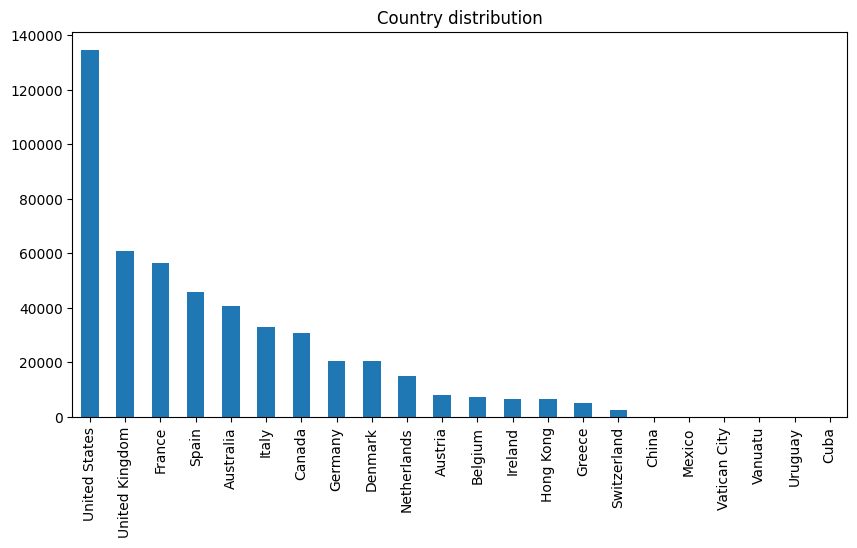

In [35]:
# create bar chart for all 'Country' values
data['Country'].value_counts().plot(kind='bar', figsize=(10,5), title='Country distribution')